# Advection Equation

## Lax-Wendroff method

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.abs(a)   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


## Solution of the equation

In [2]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images/dx_20/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    # pluggin already the first half-step into the second: 
    
    u_next = u_current - a * dt / (2 * dx) * (np.roll(u_current, -1) - np.roll(u_current, +1)) + a**2 * dt**2 / (2 * dx**2) * (np.roll(u_current, -1) - 2 * u_current + np.roll(u_current, +1))
    
    
    # Update the solution
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

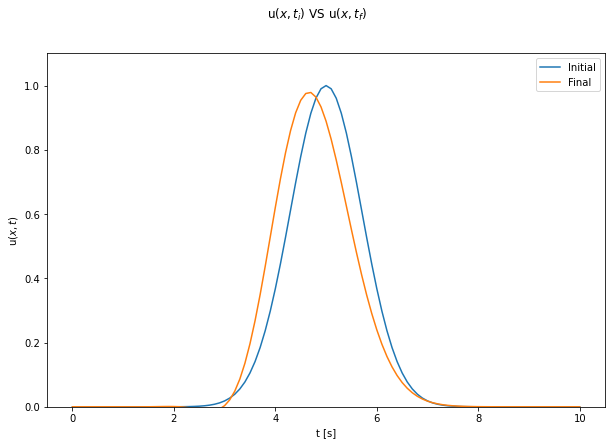

In [3]:
plt.figure(figsize = (10, 6.5))
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
#plt.title('Time='+str(round(t,2)))
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.suptitle("$\mathrm{u}(x, t_i)$ VS $\mathrm{u}(x, t_f)$")
plt.ylim(0, 1.1)
plt.legend()
plt.show()

See the values of the norms as time passes: 

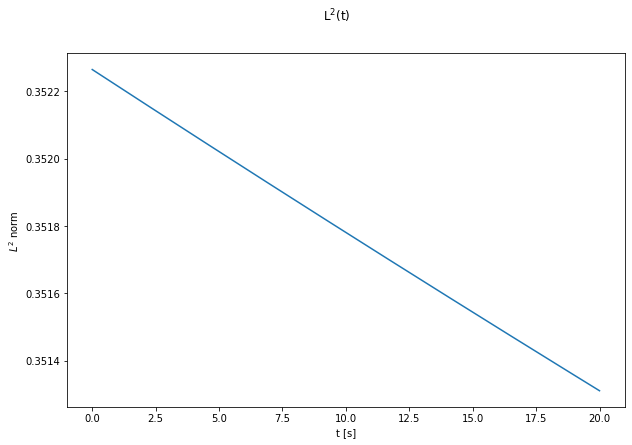

In [4]:
plt.figure(figsize = (10, 6.5))
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.plot(time,l2norm)
plt.show()

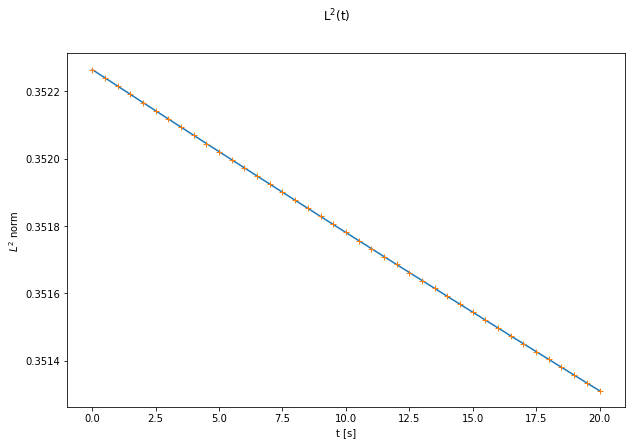

In [5]:
#Compare with data stored
plt.figure(figsize = (10, 6.5))
l2_saved=np.genfromtxt('./l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time,l2norm)
plt.xlabel("t [s]")
plt.ylabel("$L^2$ norm")
plt.suptitle("$\mathrm{L^2(t)}$")
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

### FuncAnimation animations:

Here I just report an additional code I developed to see animation without having to save the images every time.

In [6]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


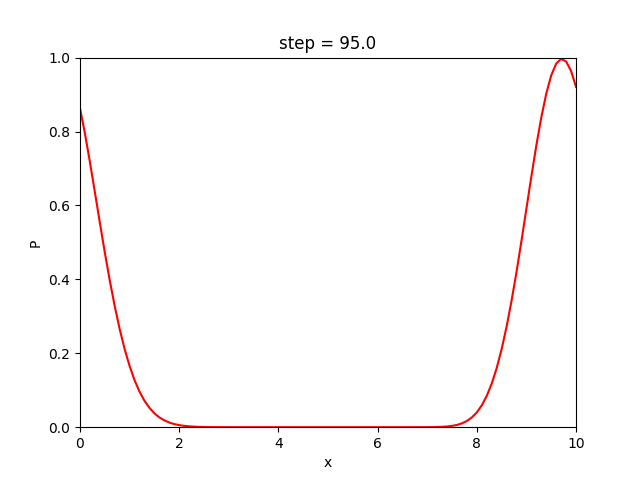

In [7]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, 'r-')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"step = {t:.1f}")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 5), blit=True)
ani.save('u_LW.gif')
plt.show()